# Part 3: Visualization of Results

## Import Necessary Libraries for Data Visualization

For the data visualization aspect of your project, it is essential to import libraries that will enable you to create effective and insightful visual representations of your text mining results.

### Guidance on Choosing Visualization Libraries:

- **Selecting the Right Tools:** Choose libraries that offer the visualization capabilities you need. Common choices include `matplotlib` for creating a wide range of static plots, `seaborn` for advanced statistical visualizations, and `plotly` for interactive graphs.

- **Ease of Use:** If you're new to visualization, you might prefer libraries with simpler syntax and extensive community support, like `matplotlib`. For more complex, interactive visualizations, `plotly` or `bokeh` might be more suitable.

- **Customization and Flexibility:** Some visualizations might require extensive customization. Libraries like `matplotlib` offer a great deal of flexibility in tweaking your plots.

### Example of Importing Visualization Libraries:

```python
import matplotlib.pyplot as plt
import seaborn as sns
# Optional: import plotly.express as px for interactive plots

# Other imports for handling your data
import json
# Add any additional libraries as needed


In [19]:
# your imports go here
#
#
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from types import SimpleNamespace

### Load data from a JSON file(s)

In [26]:

sentiment_data = ""
# Load data from JSON file of book
bookdata = "frankenstein"
#bookdata = "dracula"
#bookdata = "DrJekyllAndMrHyde"
with open(f'{bookdata}_MainCharacters_NER.json', 'r') as file:
    data = json.load(file)
entity_data =  json.loads(data, object_hook=lambda d: SimpleNamespace(**d))



## Visualization Functions - A Chance for Creativity

This part of the assignment is an excellent opportunity for you to be creative with your data visualizations. While we provide a few suggestions, you are not limited to these. Feel free to explore any visualization techniques that you think will best represent your data. The goal is to effectively communicate the insights you've gained from your text mining process in a visually engaging manner.

#### Visualization Suggestions:

1. **Entity Co-occurrence Network:**
   - Visualizes connections between entities.

2. **Sentiment Distribution:**
   - Shows how sentiment scores are spread across the text.

3. **Word Clouds:**
   - Highlights prominent words or entities.

4. **Heatmaps:**
   - Useful for displaying variations in data across chapters.

5. **Semantic Similarity Maps:**
   - Explores thematic connections between entities or topics.

#### Creative Freedom:

- **Go Beyond the Suggestions:** You are encouraged to think outside the box and explore visualizations that might not be listed here. Every narrative has unique aspects that might be best represented through a custom visualization approach.

- **Mix and Match:** Feel free to combine elements from different types of visualizations to create something new. For instance, integrating a network graph with a heatmap could offer a novel way to visualize data.

- **Use of Advanced Tools:** If you are comfortable with more advanced visualization tools or libraries, consider employing them to create more complex or interactive visualizations.

- **Focus on Storytelling:** Remember that the ultimate aim of visualization is to tell a story with your data. Choose or create visualizations that best narrate the insights from your text analysis.

#### Example of Creative Visualization:

```python
def your_custom_visualization_function(data):
    # TODO: Implement your unique visualization idea here
    pass

# Example usage (remember to replace with actual data)
# your_custom_visualization_function(your_data)


### Function to Plot Sentiment Over Time for a Specific Entity (Suggested Visualization)

This function is an essential tool in your data visualization arsenal. It's designed to display changes in sentiment associated with a specific entity, such as a character or an organization, throughout the narrative. This visualization can offer valuable insights into character development or thematic shifts over time.

#### Key Components of the Function:

- **Input Parameters:**
  - `data`: This parameter should receive the sentiment analysis results, which include sentiment scores linked to entities at different points in the text (like chapters or sections).
  - `entity`: This is the specific entity for which you're plotting the sentiment trajectory.

- **Data Preparation:**
  - The function extracts sentiment scores for the specified entity from your dataset. This involves filtering the data to retrieve sentiment values that correspond to the entity at different narrative points.

- **Plotting the Data:**
  - The function uses a plotting library, such as `matplotlib`, to create a line graph. The x-axis typically represents the progression through the narrative (e.g., chapter numbers), while the y-axis displays the sentiment scores.
  - The plot can be customized with titles, axis labels, and other stylistic features to enhance clarity and visual appeal.

- **Flexibility in Use:**
  - This function can be adapted based on the structure of your dataset and the specific requirements of your analysis.
  - You're encouraged to experiment with different plot types (e.g., bar graphs, scatter plots) and visualization libraries to find the most effective representation for your data.

#### Example with a Dummy Plot:

```python
import matplotlib.pyplot as plt

def plot_sentiment_over_time(data, entity):
    # Dummy data for illustration
    chapters = list(range(1, 11))  # Chapters 1 to 10
    sentiments = [0.1, -0.2, 0.3, -0.1, 0.2, 0.1, -0.3, 0.4, -0.2, 0.2]  # Example sentiment scores

    plt.figure(figsize=(10, 6))
    plt.plot(chapters, sentiments, marker='o', linestyle='-', color='b')
    plt.title(f'Sentiment of {entity} Over Time')
    plt.xlabel('Chapter')
    plt.ylabel('Sentiment Score')
    plt.grid(True)
    plt.show()

# Example usage with dummy data
plot_sentiment_over_time(sentiment_data, 'Alice')
```

![Sentiment Over Time](sentiment_over_time_plot.png)

## Function for Visualization 1:

In [22]:
def visualise_heatmap_of_book(entity_data):
    occurrences_of_characters = {}

    # Loop through each character in the entity data
    for main_character in entity_data:
        # Extract the name of the character
        char_name = main_character.name

        # Initialize a dictionary to count occurrences per chapter for this character
        occurence_per_chapter = dict()

        # Loop through each occurrence of the character
        for occurrence in main_character.Occurrences:
            # Extract the chapter key (e.g., 'Chapter_1') from the occurrence data 
            chapter_key = occurrence.chapter[0]

            # Increment the count for this chapter, or initialize it to 1 if not already present
            if chapter_key in occurence_per_chapter:
                occurence_per_chapter[chapter_key] += 1
            else:
                occurence_per_chapter[chapter_key] = 1

        # Sort the chapters numerically and convert back to a dictionary
        sorted_chapters = sorted(occurence_per_chapter.items(), key=lambda x: int(x[0].split('_')[-1]))
        occurence_per_chapter = dict(sorted_chapters)

        # Add the sorted chapter occurrences to the main dictionary under the character's name
        occurrences_of_characters[char_name] = occurence_per_chapter

    # Initialise unique chapter names set
    all_chapters = set()
    #loop through values of occurrences dict
    for character in occurrences_of_characters.values():
        # Update set with chapter keys from character occurrences
        all_chapters.update(character.keys())

    # Sort the chapter names numerically to determine the column order for the DataFrame (expression produced by chatGPT)
    sorted_chapters = sorted(all_chapters, key=lambda x: int(x.split('_')[-1]))

    # Create a DataFrame with occurrences. Characters/protagonists are shown rows and chapters as columns
    heatmap_data = pd.DataFrame.from_dict(occurrences_of_characters, orient="index", columns=sorted_chapters)

    # Create and configure a heatmap visualization
    plt.figure(figsize=(15, 10))  # Set the size of the heatmap
    sns.heatmap(heatmap_data, annot=True, cmap='viridis')  # Create heatmap with annotations and 'viridis' color map
    plt.title('Character Occurrences by Chapter')  # Set title of heatmap
    plt.ylabel('Character')  # Label for the y-axis
    plt.xlabel('Chapter')  # Label for the x-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels so the text is actually readable
    plt.show()  # Display heatmap

#We used ChatGPT for the generation of some comments as well as for ordering the chapters numerically

## Function for Visualization 2:

In [14]:
# TODO: Visualization 2
#def visualise_heatmap_of_book(entity_data):

## Main Execution for Creating Visualizations

In this section of your Jupyter Notebook, you will bring together all the visualization functions you've defined earlier and apply them to your datasets. The aim is to create visualizations for both the initial dataset obtained from grep extraction and the refined dataset processed with more sophisticated NLP libraries like spaCy. This dual approach allows you to compare and contrast the insights gained from basic and advanced text analysis methods.

### Steps for Visualization Execution:

1. **Prepare Your Data:**
   - Ensure that both your datasets (grep extraction results and spaCy-processed results) are ready for visualization. They should be preprocessed and structured appropriately for the visualization functions you have created.

2. **Call Visualization Functions:**
   - For each visualization function, call it twice: once with the grep-extracted dataset and once with the dataset obtained using advanced NLP techniques.
   - This approach will enable you to create corresponding visualizations for both sets of data, facilitating a comparative analysis.

3. **Analyzing the Visualizations:**
   - Observe the differences and similarities in the visualizations generated from the two datasets.
   - Analyze how the depth of analysis (basic vs. advanced) affects the visualization outcomes and what insights each method offers.

4. **Document Observations:**
   - While creating these visualizations, document any interesting findings or anomalies you observe. Reflect on how the method of data extraction and analysis influences the final visualization.

5. **Code Example:**
   - Here’s how you might structure the code in this section:

```python
# Example: Plotting sentiment over time using both datasets
plot_sentiment_over_time(grep_data, 'EntityName')
plot_sentiment_over_time(spacy_data, 'EntityName')

# Repeat the above for other visualization functions and datasets


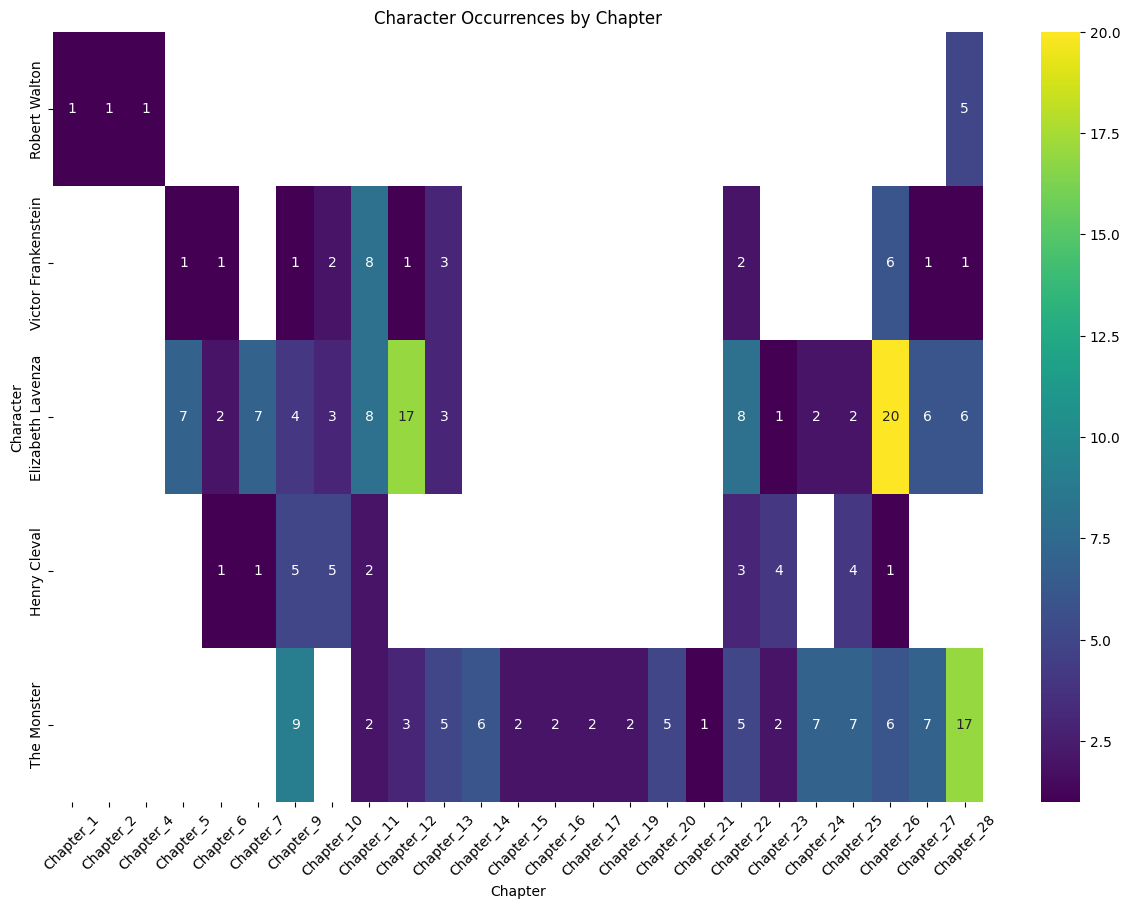

In [27]:
# TODO: Call the visualization functions with appropriate parameters
visualise_heatmap_of_book(entity_data)

## Discussion

- **Interpretation of Trends:**
  - How do the trends in sentiment and entity occurrence align with key events or themes in the narrative? Can you identify any correlation between the two?

- **Impact of Visualization Design:**
  - How did the choice of visualization design (like color, scale, type of plot) impact the readability and interpretation of your data?

- **Comparative Analysis:**
  - If you visualized data using different tools (e.g., Matplotlib vs. Plotly), how did the tool choice affect the outcome and your ability to convey information?

- **Insights Gained:**
  - What unexpected insights did the visualizations reveal about the book’s characters or sentiments that were not apparent from your initial extractions?

- **Limitations of Visualizations:**
  - What limitations did you encounter with your visualizations? How might these limitations affect the conclusions you can draw from your analysis?

- **Improvements and Alternatives:**
  - If given more time or resources, how would you improve your visualizations? Are there alternative methods or data representations you would like to explore?

- **Real-World Application:**
  - How could the techniques you used for visualization in this project be applied to real-world data analysis scenarios?

- **Learning Experience:**
  - What did creating these visualizations teach you about the process of transforming raw data into an interpretable format?

### Pick at least 3 questions and provide a comprehensive and thoughtful answer to them here:
your answers go here